### Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

#### Question or problem definition

1. Can you predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors?

2. Problem description:
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

3. It looks like a classification problem in supervised machine learning

**Additionally, I have read through the short history of the H1N1 influenza virus (Swine flu) on the competition's site**

In [1]:
# Modules for this project
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning algorithms for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

**Load the datasets and preview the dataset features**


*# I need to have an idea of how the dataset looks like before reading it*

In [2]:
!head -4 training_set_features.csv

respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,1,2,2,1,2,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,,
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,5,4,4,4,2,4,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle  City",0,0,pxcmvdjn,xgwztkwe
2,1,1,0,1,0

**# Preview of the training features**

In [20]:
flushotTrainData = pd.read_csv('training_set_features.csv', index_col='respondent_id')
flushotTrainData.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


**For this competition, there are two target variables:**

*1. h1n1_vaccine - Whether respondent received H1N1 flu vaccine.*

*2. seasonal_vaccine - Whether respondent received seasonal flu vaccine.*

In [21]:
flushotDataLabels = pd.read_csv('training_set_labels.csv', index_col='respondent_id')
flushotDataLabels.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


**Preview of the test data features**

In [5]:
flushotTestData = pd.read_csv('test_set_features.csv')
flushotTestData.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [22]:
flushotTrainData.shape

(26707, 35)

In [23]:
flushotTestData.shape

(26708, 36)

**The training set has 26,707 observations and 35 features, taking away the index column**

**The test set has 26,708 observations and 35 features, taking away the index column**

In [8]:
combinedDataset = [flushotTrainData, flushotTestData]
type(combinedDataset)

list

**Features available in the training dataset**

In [24]:
print(flushotTrainData.columns)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


**Which features are categorical and or numerical?**

*A categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.*

*A numerical variable is a variable where the measurement or number has a numerical meaning*

In [25]:
flushotTrainData.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [26]:
flushotTrainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [27]:
flushotTrainData['employment_industry'].head()

respondent_id
0         NaN
1    pxcmvdjn
2    rucpziij
3         NaN
4    wxleyezf
Name: employment_industry, dtype: object

**Numerical variables**

**Like earlier stated, because the value of column is numerical does not translate that column as being a numerical variable**


**Categorical variables**

**The training set has a prevalence of categorical data**

*Let me check the label data and make some confirmation*

**The label data contains the two target variables**

In [28]:
flushotDataLabels.shape

(26707, 2)

**Its the same number of rows as the feature sets**

**Let's double-check that the rows between the features and the labels match up. We don't want to have the wrong labels. Numpy's assert_array_equal will error if the two arrays—the row indices of the two data frames—don't match up.**

*It amazing to learn new stuff*

In [29]:
np.testing.assert_array_equal(flushotTrainData.index.values, flushotDataLabels.index.values)

**What is the distribution of feature values across the training set?**

**Which columns have missing values?**

**Using the describe function on a dataset helps you eyeball a few observations**

*Like the count let's you know the likely-hood of missing values in a column, the variability of the column values, the distribution of values in percentiles etc** 

In [30]:
flushotTrainData.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


**Exploring the flu shot datasets**

*This exploration is partly inspired by the walk-through provided Jayqi on the driven data site. So you may see some similarities*

**We start off by exploring the flu shot labels**

*The idea is to understand the distribution of the labels (two target variables)*

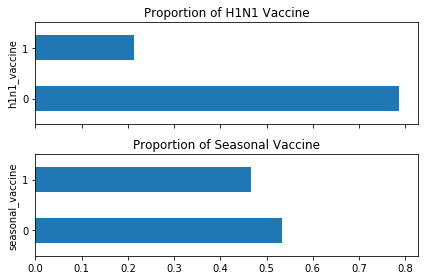

In [31]:
fig, ax = plt.subplots(2, 1, sharex=True) # creating a figure a set of subplots
# sharex=True means the x and y axis will be shared among subplots

n_obs = flushotDataLabels.shape[0] # The number of rows of in the label data set

(flushotDataLabels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(flushotDataLabels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

**Observations**

*1. About 80% of respondents did not receive the H1N1 vaccine* 

*2. The difference in respondents who received and did not receive the Seasonal vaccine is not so significant*

In [32]:
pd.crosstab(
    flushotDataLabels["h1n1_vaccine"], 
    flushotDataLabels["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


**pd.crosstab function computes a simple cross tabulation of two (or more) factors. In this case, both target variables**

**Most people who got an H1N1 flu vaccine also got the seasonal flu vaccine. While a minority of people who got the seasonal vaccine got the H1N1 vaccine, they got the H1N1 vaccine at a higher rate than those who did not get the seasonal vaccine**

In [33]:
# Phi Coefficient is the same as Pearson for two binary variables
(flushotDataLabels["h1n1_vaccine"]
     .corr(flushotDataLabels["seasonal_vaccine"], method="pearson")
)

0.3771426530614468

**The Phi Coefficient is a measure of association between two binary variables**

**At least one variable is a nominal variable or both variables are dichotomous variables.**

**The phi coefficient is a symmetrical statistic, which means the independent variable and dependent variables are interchangeable.The interpretation for the phi coefficient is similar to the Pearson Correlation Coefficient. The range is from -1 to 1, where:

*0 is no relationship.*

*1 is a perfect positive relationship: most of your data falls along the diagonal cells.*

*-1 is a perfect negative relationship: most of your data is not on the diagonal.*

**What is the interpretation of 0.3771426530614468?**

**Here is a list of Pearson Correlation Coefficient:**
	
+.70 or higher	Very strong positive relationship

+.40 to +.69	Strong positive relationship

+.30 to +.39	Moderate positive relationship

+.20 to +.29	weak positive relationship

+.01 to +.19	No or negligible relationship

0	No relationship

-.01 to -.19	No or negligible relationship

-.20 to -.29	weak negative relationship

-.30 to -.39	Moderate negative relationship

-.40 to -.69	Strong negative relationship

-.70 or higher	Very strong negative relationship

**So there is a moderate positive relationship between the two target variables** 

### Understanding Features

**combine features and labels into one dataframe.**

In [34]:
joinflushotTrainData = flushotTrainData.join(flushotDataLabels)
print(joinflushotTrainData.shape)
joinflushotTrainData.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


**Prototyping a Plot**

**let's see how the features are correlated with the target variables**

**We'll start with trying to visualize if there is simple bivariate correlation. If a feature is correlated with the target, we'd expect there to be different patterns of vaccination as you vary the values of the feature**

**Finding the relationship between features and the target variable**

**Here, I started with one feature and used the h1n1_vaccine as the first target variable, similar to what the author of the walk-through did**

In [35]:
# we'll get the count of observations for each combination of those two variables
counts = (joinflushotTrainData[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


**Let's put this into a bar chart. We'll compare how the group sizes change as you vary h1n1_concern**

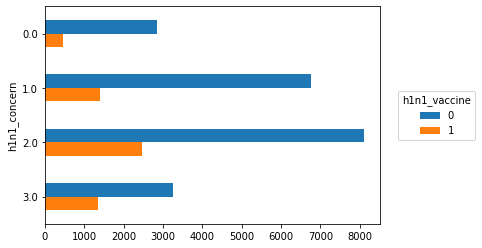

In [37]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
);

**Observations**

**1. h1n1_concern represents the level of concern about the H1N1 flu. Here, we see for every level of concern, there's a high unlikelihood of receiving the h1n1 vaccine**

**2. People with 2 = Somewhat concerned, seem not to have received the h1n1 vaccine the most. It also showed they received most of the vaccine**

**3. People who weren't concerned represented their lack of concern by not receiving the vaccine**


In [38]:
# look at the rate of vaccination for each level of h1n1_concern
# Did a sum of all individul concern level of h1n1(0 & 1)
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [39]:
# Divided the sum of counts by 0 & 1 of the h1n1
# This provided the value of those who received and did not receive based on level of concern
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


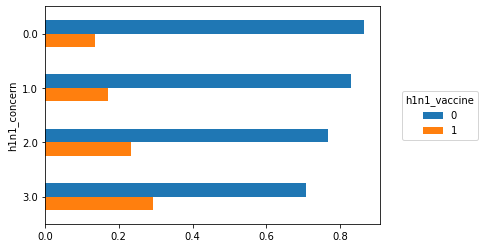

In [40]:
# Plot a bar histogram of this division
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
);

**This shows that the more the level of concern, the higher the chances of receiving a vaccine**

**Since every pair of bars adds up to 1.0 and we only have two bars, this is actually a good use case for a stacked bar chart, to make it even easier to read.**

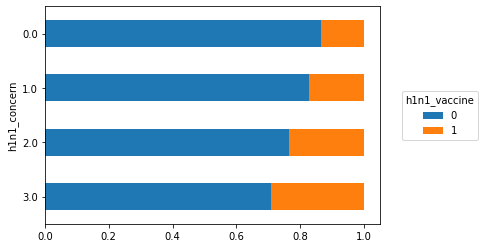

In [42]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
);

**Plotting more variables**